# The Discrete-Time Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Definition

The [discrete-time Fourier transform](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) of a discrete signal $x[k]$ is defined as

\begin{equation}
X(e^{j \Omega}) = \sum_{k = -\infty}^{\infty} x[k] \, e^{-j \Omega k}
\end{equation}

where $\Omega \in \mathbb{R}$ denotes the normalized angular frequency. The DTFT maps a discrete signal $x[k]$ with $k \in \mathbb{Z}$ onto its continuous transform $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ with $\Omega \in \mathbb{R}$. It is frequently termed as *spectrum* of the discrete signal $x[k]$. The argument $e^{j \Omega}$ copes for the fact that the kernel $e^{-j \Omega k}$ of the DTFT is a [complex exponential signal](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) $z^{-k}$ with $z = e^{j \Omega}$. Other common definitions of the DTFT may be found in the literature. They differ with respect to the sign of the exponential function and normalization factors. The properties, theorems and transforms may differ from the ones given here, as a consequence.

A sufficient but not necessary condition for the existence of the DTFT is

\begin{equation}
\left|X(e^{j \Omega})\right| = \left| \sum_{k = -\infty}^{\infty} x[k] \, e^{-j \Omega k} \right| 
\leq \sum_{k = -\infty}^{\infty} \left| x[k] \right| < \infty
\end{equation}

where the upper bound results from the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality). As sufficient condition for the existence of the DTFT, it follows that a signal $x[k]$ needs to be absolutely summable.

The DTFT is periodic with a period of $T_\text{p} = 2 \pi$,

\begin{equation}
X(e^{j \Omega}) = X(e^{j (\Omega + n \cdot 2 \pi)})
\end{equation}

for $n \in \mathbb{Z}$. This follows from the periodicity of its exponential kernel $e^{j \Omega k} = e^{j (\Omega + 2 \pi) k}$ for discrete $k \in \mathbb{Z}$. It is therefore sufficient to regard the DTFT in one period only. Typically the period $-\pi < \Omega < \pi$ is chosen. The information on the discrete signal $x[k]$ is contained in one period. As a consequence, the inverse discrete-time Fourier transform $x[k] = \mathcal{F}_*^{-1} \{ X(e^{j \Omega}) \}$ is defined as

\begin{equation}
x[k] = \frac{1}{2 \pi} \int_{-\pi}^{\pi} X(e^{j \Omega}) \, e^{j \Omega k} \; d \Omega
\end{equation}



### Transformation of the Dirac Impulse

The transform $\mathcal{F}_* \{ \delta[k] \}$ of the [Dirac impulse](../discrete_signals/standard_signals.ipynb#Dirac-Impulse) is derived by introducing $\delta[k]$ into the definition of the DTFT and exploiting the sifting property of the Dirac impulse

\begin{equation}
\mathcal{F}_* \{ \delta[k] \} = \sum_{k = -\infty}^{\infty} \delta[k] \, e^{-j \Omega k} = 1
\end{equation}

The transform of the Dirac impulse is equal to one. Hence, all normalized frequencies $\Omega$ are present with equal weight. This is an important property in the theory of discrete signals and systems, since the Dirac impulse is used to characterize linear time-invariant (LTI) systems by their [impulse response](../discrete_systems/impulse_response.ipynb) $h[k] = \mathcal{H} \{ \delta[k] \}$.

**Exercise**

* Derive the DTFT of a shifted Dirac impulse $\delta[k - \kappa]$.

### Transformation of the Rectangular Signal

The DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ \text{rect}_N[k] \}$ of the [rectangular signal](../discrete_signals/standard_signals.ipynb#Rectangular-Signal) is derived by introducing its definition into the definition of the DTFT. This results in

\begin{equation}
\mathcal{F}_* \{ \text{rect}[k] \} = \sum_{k = -\infty}^{\infty} \text{rect}[k] \, e^{-j \Omega k} =
\sum_{k = 0}^{N-1} e^{-j \Omega k} = e^{-j \Omega \frac{N-1}{2}} \cdot \frac{\sin \left(\frac{N \Omega}{2} \right)}{\sin \left( \frac{\Omega}{2} \right)}
\end{equation}

The latter equality has been derived by noting that the sum constitutes a [finite geometrical series](https://en.wikipedia.org/wiki/Geometric_series) with the common ratio $e^{-j \Omega}$. Note, that

\begin{equation}
\frac{\sin \left(\frac{N \Omega}{2} \right)}{\sin \left( \frac{\Omega}{2} \right)} \bigg\rvert_{\Omega = n \cdot 2 \pi} = N 
\end{equation}

for $n \in \mathbb{Z}$ due to [L'Hôpital's rule](https://en.wikipedia.org/wiki/L'H%C3%B4pital's_rule).

**Example**

The DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ \text{rect}_N[k] \}$ of the rectangular signal is computed for a specific length $N$ by evaluating the finite series above using `SymPy`.

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

W = sym.symbols('Omega', real=True)
k = sym.symbols('k', integer=True)

N = 5
X = sym.summation(sym.exp(-sym.I*W*k), (k, 0, N-1))
X

The magnitude $|X(e^{j \Omega})|$ and phase $\varphi(e^{j \Omega}) = \arg \{ X(e^{j \Omega}) \}$ of the spectrum is plotted for illustration

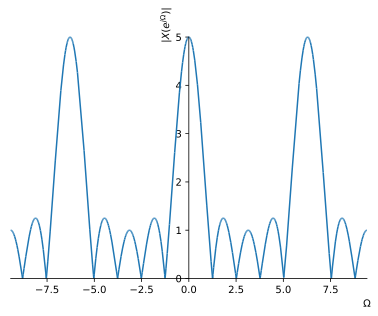

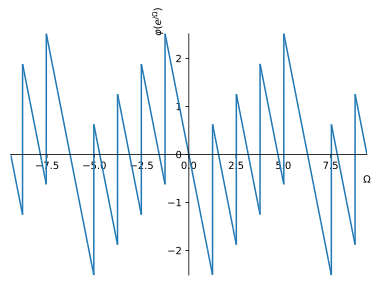

In [2]:
sym.plot(sym.Abs(X), (W, -3*sym.pi, 3*sym.pi), xlabel=r'$\Omega$', ylabel=r'$| X(e^{j \Omega}) |$')
sym.plot(sym.arg(X), (W, -3*sym.pi, 3*sym.pi), xlabel=r'$\Omega$', ylabel=r'$\varphi(e^{j \Omega})$');

**Exercise**

* What happens to the magnitude/phase if you increase/decrease the length $N$ of the rectangular signal?

### Transformation of the Exponential Signal

The DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ e^{j \Omega_0 k} \}$ of the [harmonic exponential signal](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) with normalized frequency $\Omega_0$ is derived by introducing it into the definition of the DTFT. This results in

\begin{equation}
\mathcal{F}_* \{ e^{j \Omega_0 k} \} = \sum_{k = -\infty}^{\infty} e^{j \Omega_0 k} \, e^{-j \Omega k} =
\sum_{k = -\infty}^{\infty} e^{-j (\Omega - \Omega_0) k} = {\bot \!\! \bot \!\! \bot}\left( \frac{\Omega - \Omega_0}{2 \pi} \right)
\end{equation}

where for the last equality the [Fourier transform of the Dirac comb](../periodic_signals/spectrum.ipynb#The-Dirac-Comb) has been used. The DTFT of the exponential signal is a periodic series of shifted Dirac impulses, as

\begin{equation}
{\bot \!\! \bot \!\! \bot}\left( \frac{\Omega - \Omega_0}{2 \pi} \right) = 2 \pi \sum_{\mu = -\infty}^{\infty} \delta(\Omega - \Omega_0 - 2 \pi \mu)
\end{equation}

### Relation to the z-Transform

The DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ of a signal $x[k]$ can be related to its [two-sided $z$-transform](../z_transform/definition.ipynb#Two-Sided-$z$-Transform) $X(z) = \mathcal{Z} \{ x[k] \}$ by inspecting the kernels of both transforms. The $z$-transform has the complex exponential function $z^{-k}$ with $z \in \mathbb{C}$ as kernel. The DTFT has the harmonic exponential function $e^{- j \Omega k}$ with $\Omega \in \mathbb{R}$ as kernel. Both can be related to each other by considering that $z = e^{\Sigma + j \Omega}$. Hence, if the ROC includes the unit circle $|z| = 1$ of the $z$-plane, the DTFT of a signal $x[k]$ can be derived from its $z$-transform by

\begin{equation}
\mathcal{F}_* \{ x[k] \} = \mathcal{Z} \{ x[k] \} \bigr\rvert_{z = e^{j \Omega}}
\end{equation}

If the ROC does not include the unit circle, the DTFT of a given signal does not exist. A benefit of the $z$-transform over the DTFT is that it can be applied to a wider class of signals.

**Example**

The DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ of the causal exponential signal

\begin{equation}
x[k] = \epsilon[k] \cdot e^{- \Sigma_0 k} 
\end{equation}

for $\Sigma_0 \in \mathbb{R}^+$ is derived from the $z$-transform of the [causal complex exponential signal](#Transformation-of-the-Causal-Complex-Exponential-Signal). Using the substituting $z_0 = e^{-\Sigma_0}$ yields

\begin{equation}
X(z) = \frac{z}{z - e^{-\Sigma_0}}
\end{equation}

with the ROC $|z| > e^{-\Sigma_0}$. The ROC includes the unit circle for $0 < \Sigma_0 < \infty$. The DTFT can be derived from the $z$-transform by substituting $z$ with $e^{j \Omega}$ as

\begin{equation}
X(e^{j \Omega}) = \frac{e^{j \Omega}}{e^{j \Omega} - e^{-\Sigma_0}}
\end{equation}

### Link to Fourier Transform of a Sampled Signal

The link between the Fourier transform of a sampled signal $x_\text{s}(t)$ and the DTFT of its discrete counterpart $x[k] = x(k T)$ is established in the following. Under the assumption of [ideal sampling](../sampling/ideal.ipynb#Model-of-Ideal-Sampling), the sampled signal reads

\begin{equation}
x_\text{s}(t) = \sum_{k = -\infty}^{\infty} x(k T) \cdot \delta(t - k T) = \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T)
\end{equation}

where $x(t)$ denotes the continuous signal and $T$ the sampling interval. Introducing the sampled signal into the [definition of the Fourier transform](../fourier_transform/definition.ipynb) yields the spectrum of the sampled signal

\begin{equation}
X_\text{s}(j \omega) = \int_{-\infty}^{\infty} \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T) \, e^{-j \omega t} \; dt = \sum_{k = -\infty}^{\infty} x[k] \, e^{-j \omega k T}
\end{equation}

where the last equality has been derived by changing the order of summation/integration and exploiting the [sifting property of the Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse). Comparison with the definition of the DTFT yields

\begin{equation}
X_\text{s}(j \omega) = X(e^{j \Omega}) \big\rvert_{\Omega = \omega T}
\end{equation}

The spectrum of the sampled signal $X_\text{s}(j \omega)$ is equal to the DTFT of the discrete Signal $X(e^{j \Omega})$ for $\Omega = \omega T$. This result can be used to interpret the frequency axis of the DTFT.

### Interpretation of the Spectrum

It can be concluded from the definition of the inverse DTFT that a discrete signal $x[k]$ can be represented as a superposition of weighted harmonic exponential signals $X(e^{j \Omega}) \cdot e^{j \Omega k}$ for $-\pi < \Omega < \pi$. In general, the spectrum $X(e^{j \Omega})$ will also have contributions for negative normalized angular frequencies $-\pi < \Omega < 0$. The concept of [negative frequencies](https://en.wikipedia.org/wiki/Negative_frequency) has no physical meaning. However, in the context of the DTFT with its complex kernel $e^{j \Omega k}$ negative frequencies are required to express complex and real-valued signals.

The DTFT of a discrete signal $x[k] \in \mathbb{C}$ is in general complex valued, $X(e^{j \Omega}) \in \mathbb{C}$. It is commonly represented by its real and imaginary part 

\begin{equation}
X(e^{j \Omega}) = \Re \{ X(e^{j \Omega}) \} + j \cdot \Im \{ X(e^{j \Omega}) \}
\end{equation}

or by its magnitude and phase 

\begin{equation}
X(e^{j \Omega}) = |X(e^{j \Omega})| \cdot e^{j \varphi(e^{j \Omega})}
\end{equation}

The magnitude spectrum $|X(e^{j \Omega})|$ provides insights into the composition of a signal in terms of its harmonic contributions. For a discrete signal which has been derived by sampling from a continuous signal, the normalized angular frequency $\Omega$ can be related to the

* angular frequency $\omega$ by $\Omega = \omega T$
* frequency $f$ by $\Omega = 2 \pi \frac{f}{f_\text{s}}$

where $T$ and $f_\text{s} = \frac{1}{T}$ denote the sampling interval and frequency, respectively. This result can be used to interpret the frequency of the DTFT as follows

![DTFT frequency axes for sampled signals](DTFT_axis.png)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.